In [1]:
#Describe use the relative Strength Index (RSI) and python to determine if the stockis being over bought or over sold

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
#load the data
df= yf.Ticker('META').history(start='2019-05-20',end='2020-05-20')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-20,181.880005,184.229996,181.369995,182.720001,10352000,0,0
2019-05-21,184.570007,185.699997,183.889999,184.820007,7502800,0,0
2019-05-22,184.729996,186.740005,183.610001,185.320007,9213800,0,0
2019-05-23,182.419998,183.899994,179.669998,180.869995,12768800,0,0
2019-05-24,182.330002,183.630005,180.830002,181.059998,8807700,0,0
...,...,...,...,...,...,...,...
2020-05-13,209.429993,210.779999,202.110001,205.100006,20684600,0,0
2020-05-14,202.559998,206.929993,200.690002,206.809998,17178900,0,0
2020-05-15,205.270004,211.339996,204.119995,210.880005,19383200,0,0


In [4]:
#set the dates as the index for the data
#FB=FB.set_index(pd.DatetimeIndex(FB['Date'].values))
#fb

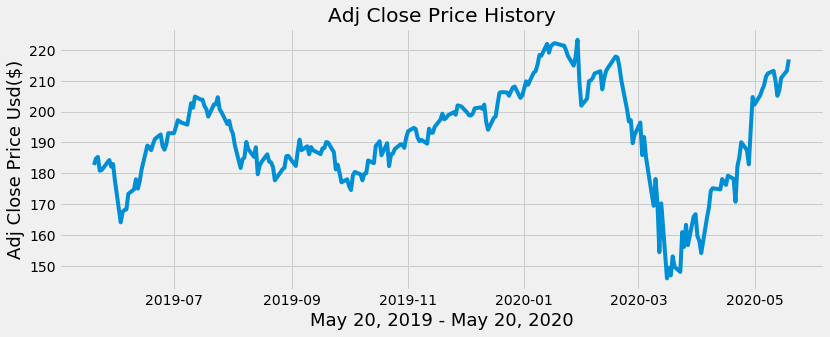

In [5]:
#Visually Show the price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.title('Adj Close Price History')
plt.xlabel('May 20, 2019 - May 20, 2020',fontsize=18)
plt.ylabel('Adj Close Price Usd($)',fontsize=18)
plt.show()

In [6]:
#Prepare the data to calculate The RSI
#get the difference in price from the previous day
delta=df['Close'].diff(1)
delta

Date
2019-05-20         NaN
2019-05-21    2.100006
2019-05-22    0.500000
2019-05-23   -4.450012
2019-05-24    0.190002
                ...   
2020-05-13   -5.000000
2020-05-14    1.709991
2020-05-15    4.070007
2020-05-18    2.309998
2020-05-19    3.690002
Name: Close, Length: 253, dtype: float64

In [7]:
#get rid of NaN
delta=delta.dropna()
delta

Date
2019-05-21    2.100006
2019-05-22    0.500000
2019-05-23   -4.450012
2019-05-24    0.190002
2019-05-28    3.250000
                ...   
2020-05-13   -5.000000
2020-05-14    1.709991
2020-05-15    4.070007
2020-05-18    2.309998
2020-05-19    3.690002
Name: Close, Length: 252, dtype: float64

In [8]:
#Get the Possitive gains(up) and negative gain
up=delta.copy()
down=delta.copy()

In [9]:
up[up<0]=0
down[down>0]=0

In [10]:
#Get the time period
period=20
#Calculate the average gain and the average loss
AVG_gain=up.rolling(window=period).mean()
Avg_Loss=abs(down.rolling(window=period).mean())

In [11]:
#calculate the RSI
#Calculate the Relative Strength(RS)
RS=AVG_gain/Avg_Loss
#Calculate the relative Strength Index(RSI)
RSI=100.0-(100.0/(1.0+RS))

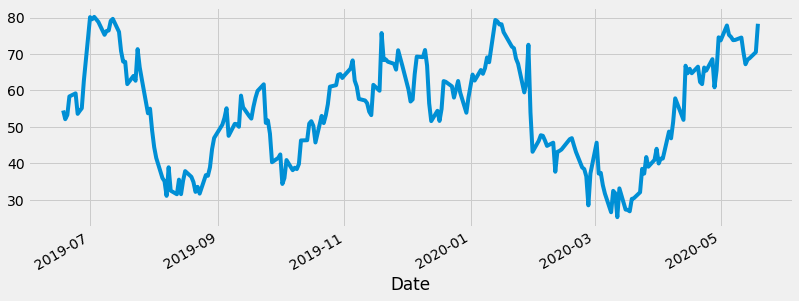

In [12]:
#show the RSI Visually
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

In [13]:
#put it all togather
#create a new data frame
new_df=pd.DataFrame()
new_df['Close']=df['Close']
new_df['RSI']=RSI
new_df

,Close,RSI
Date,,
2019-05-20,182.720001,NaN
2019-05-21,184.820007,NaN
2019-05-22,185.320007,NaN
2019-05-23,180.869995,NaN
2019-05-24,181.059998,NaN
...,...,...
2020-05-13,205.100006,67.192278
2020-05-14,206.809998,68.454108
2020-05-15,210.880005,68.860279


In [14]:
sell=new_df[new_df['RSI']>62]
buy=new_df[new_df['RSI']<40]

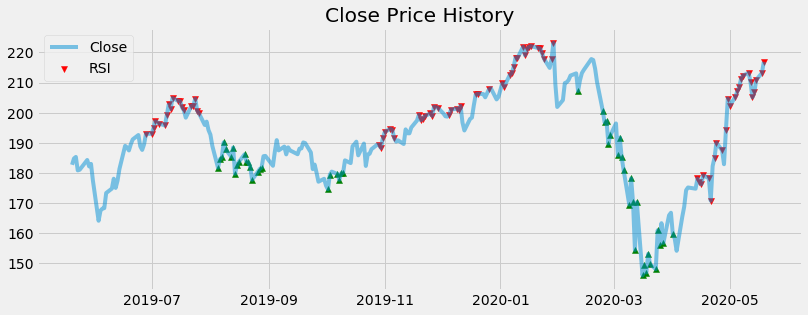

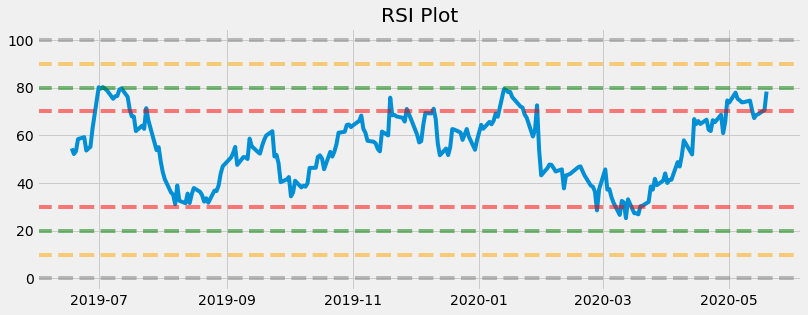

In [15]:
#Visually Show The Adjusted Close Price RSI
#Plot the adjusted Close price
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df['Close'],alpha=0.5)
plt.scatter(sell.index,sell['Close'],alpha=1,marker='v',color='red')
plt.scatter(buy.index,buy['Close'],alpha=1,marker='^',color='green')
plt.title('Close Price History')
plt.legend(new_df.columns.values,loc='upper left')
plt.show()
#Plot the corresponding RSI Values and the significant level
plt.figure(figsize=(12.2,4.5))
plt.title('RSI Plot')
plt.plot(new_df['RSI'])
plt.axhline(0,linestyle='--',alpha=0.5,color='gray')
plt.axhline(10,linestyle='--',alpha=0.5,color='Orange')
plt.axhline(20,linestyle='--',alpha=0.5,color='green')
plt.axhline(30,linestyle='--',alpha=0.5,color='red')
plt.axhline(70,linestyle='--',alpha=0.5,color='red')
plt.axhline(80,linestyle='--',alpha=0.5,color='green')
plt.axhline(90,linestyle='--',alpha=0.5,color='Orange')
plt.axhline(100,linestyle='--',alpha=0.5,color='gray')